# **Real Estate Market Analysis**

### **Importing Modules**

In [97]:
# data analysis
import numpy as np
import pandas as pd

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

### **Uploading Data**

In [98]:
data_market_prices = pd.read_csv('data/data_market_prices.csv')
data_categories = pd.read_csv('data/data_categories.csv', sep=';')
data_vas_purchases = pd.read_csv('data/data_vas_purchases.csv', sep=';')

C:\Users\pawel\AppData\Local\Temp\ipykernel_27312\2650827275.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data_market_prices = pd.read_csv('data/data_market_prices.csv')


### **Exploratory Data Analysis**

The main goal of EDA phase is to learn the structre of the data. Furthermore, this is also a great  
opportunity to discover any inconsistencies or missing valus across the dataset.

At the beginning, I will investigate the first few rows of `data_market_prices`, `data_categories` and `data_vas_purchases` datasets.

In [99]:
data_market_prices.head()

,ad_id,city_id,category_id,market,date_posted,date_expired,price_per_sqm,price,rooms_num
0,62763753,26,102,NaN,2/12/2022,3/14/2022,57.0,2600.0,2.0
1,62888959,26,102,NaN,3/17/2022,3/17/2022,47.0,9000.0,5.0
2,62925670,26,101,primary,3/28/2022,5/12/2022,15968.0,1390000.0,3.0
3,62261719,1004,101,secondary,9/9/2021,3/4/2022,6743.0,499000.0,3.0
4,62878680,26,102,NaN,3/15/2022,3/28/2022,57.0,2500.0,2.0


In [100]:
data_categories.head()

,category_id,category_name,subcategory_name
0,11,Investments,Investments
1,302,Rent,Rooms
2,402,Rent,Plots
3,502,Rent,Commercials
4,101,Sale,Apartments


In [101]:
data_vas_purchases.head()

,date_day,ad_id,city_id,category_id,amount_spend_to_promote_ads
0,2022-03-06,62845828,26,102,22.19
1,2021-03-03,61574280,26,101,11.09
2,2021-03-23,61540306,26,102,22.19
3,2022-02-26,62819726,26,102,22.19
4,2022-03-11,62679776,26,101,18.86


**The attributes have the following meaning**:  

**`data_market_prices`**: information about historical prices of properties splitted by  
category from February and March 2021 and 2022
- **ad_id**: id of the advertisement (sold property)
- **city_id**: id of the city
- **category_id**: id of the category
- **market**: market type (primary, secondary)
- **date_posted**: date when the as was posted
- **date_expired**: date when the ad expired
- **price_per_sqm**: price of the property per square meter
- **price**: total price of the property
- **rooms_num**: number of rooms in the property

**`data_categories`**: mapping to category_id available in datasets mentioned above  
(in order to get the names of categories)
- **category_id**: id of the category
- **category_name**: name of the category
- **subcategory_name**: name of the subcategory

**`data_vas_purchases`**: information about all promotional products purchases made by sellers
- **date_day**: date when seller purchased promotional product
- **ad_id**: id of the advertisement (sold property)
- **city_id**: id of the city
- **category_id**: id of the category
- **amount_spend_to_promote_ads**: amount of money spent by seller

## **Data Cleaning**

As we can see above, dataset `data_market_prices` is likely to have a few limitations. We can already notice that there  
are a some formatting issues (e.g. dates have a strange format). Moreover it is likely that there are more than a few   
missing values.  

To ensure the data is consistent I'm going to check the data dypes and missing values for each relevant column.

In [102]:
# defining list of datasets to be able to iterate over them
datasets = [data_market_prices, data_categories, data_vas_purchases]

# defining a function to be able to easily get dataframes name without the need to type it
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

### **Data Types**

In [103]:
for dataset in datasets:
    print('\n', get_df_name(dataset))
    print(dataset.dtypes)


 data_market_prices
ad_id              int64
city_id            int64
category_id        int64
market            object
date_posted       object
date_expired      object
price_per_sqm    float64
price            float64
rooms_num         object
dtype: object

 data_categories
category_id          int64
category_name       object
subcategory_name    object
dtype: object

 data_vas_purchases
date_day                        object
ad_id                            int64
city_id                          int64
category_id                      int64
amount_spend_to_promote_ads    float64
dtype: object


**Conclusions:**
- Column `rooms_num` in the `data_market_prices` table should be (if possible) converted to int.
- In `data_market_prices` dataset colums that are supposed to have date type (`date_posted`, `date_expired`)  
are formated as objects (strings). The same goes for the column `date_day` in dataset `data_vas_purchases`.

**1. Column `rooms_num` in the `data_market_prices` table should be (if possible) converted to int.**

In [104]:
data_market_prices['rooms_num'].value_counts()

2.0     27044
3.0     21091
2       13528
3       10295
1.0      8212
4.0      7394
4        5138
1        4259
5        2791
6        1511
5.0      1390
7         784
8         454
more      391
6.0       254
10        203
9         149
7.0        77
8.0        23
10.0        8
9.0         8
Name: rooms_num, dtype: int64

Data in `rooms_num` is very inconsistent. There are sa many as 3 datatypes here (int, float and string).  
In order to fix it I'll replace "more" string with 99 and conver whole column to int.

In [105]:
# replacing "more" strings with 99
data_market_prices.loc[data_market_prices['rooms_num'] == 'more', 'rooms_num'] = 99

# defining function that converts list values to int
def conversion_int(arr):
    new_arr = []
    for i in arr:
        try:
            i = int(i)      
            new_arr.append(i)
        except:
            new_arr.append(np.NaN)
    return new_arr

# datatype conversion - applying created function
data_market_prices['rooms_num'] = conversion_int(data_market_prices['rooms_num'])

**2. In `data_market_prices` dataset colums that are supposed to have date type (`date_posted`, `date_expired`)  
are formated as objects (strings). The same goes for the column `date_day` in dataset `data_vas_purchases`.**

In [106]:
from datetime import datetime

# data_market_prices
data_market_prices['date_posted'] = pd.to_datetime(data_market_prices['date_posted'])
data_market_prices['date_expired'] = pd.to_datetime(data_market_prices['date_expired'])

# data_vas_purchases
data_vas_purchases['date_day'] = pd.to_datetime(data_vas_purchases['date_day'])

Now, all columns selected for modification are saved in appropriate format.  
Thanks to this change, it is possible to carry matematical opperations and perform analysis on these columns.

### **Missing Values**

In [107]:
for dataset in datasets:
    print('\n', get_df_name(dataset))
    print(dataset.isna().sum())


 data_market_prices
ad_id                0
city_id              0
category_id          0
market           27698
date_posted          0
date_expired         0
price_per_sqm       27
price               27
rooms_num           58
dtype: int64

 data_categories
category_id         0
category_name       0
subcategory_name    0
dtype: int64

 data_vas_purchases
date_day                       0
ad_id                          0
city_id                        0
category_id                    0
amount_spend_to_promote_ads    0
dtype: int64


As expected, in the there are multiple missing value in `data_market_prices` dataset.

As `market` and `rooms_num` columns can be empty since they provide optional information about observation,  
columns `price_per_sqm` and `price` can not - I'll drop rows where they are empty.

In [108]:
data_market_prices = data_market_prices.drop(data_market_prices[(data_market_prices['price_per_sqm'].isna()) | (data_market_prices['price'].isna())].index)

### **Each Column's Main Feature Verification**

In [109]:
print('data_market_prices: is ad_id unique?')
print(data_market_prices['ad_id'].is_unique)
print('\ndata_categories: is category_id unique?')
print(data_categories['category_id'].is_unique)
print('\ndata_categories: is combination date_day and ad_id unique?')
print(bool(sum(data_vas_purchases.groupby(['date_day', 'ad_id']).size()==1)))

data_market_prices: is ad_id unique?
False

data_categories: is category_id unique?
True

data_categories: is combination date_day and ad_id unique?
True


It seems that values of `ad_id` in `data_market_prices` are not unique.  
Displaying a few examples of duplicated rows.

In [110]:
data_market_prices[data_market_prices['ad_id']==62413883]

,ad_id,city_id,category_id,market,date_posted,date_expired,price_per_sqm,price,rooms_num
45270,62413883,1004,101,primary,2021-10-21,2022-05-19,6939.0,683560.0,5.0
104778,62413883,1004,201,primary,2021-10-21,2022-05-19,6939.0,683560.0,5.0


In [111]:
data_market_prices[data_market_prices['ad_id']==61349137]

,ad_id,city_id,category_id,market,date_posted,date_expired,price_per_sqm,price,rooms_num
1034,61349137,26,101,secondary,2021-01-04,2022-06-27,21513.0,799000.0,2.0
1346,61349137,26,101,primary,2021-01-04,2022-06-27,17747.0,659123.0,2.0


In [112]:
data_market_prices[data_market_prices['ad_id']==61278966]

,ad_id,city_id,category_id,market,date_posted,date_expired,price_per_sqm,price,rooms_num
2234,61278966,26,101,primary,2020-12-09,2022-05-03,25000.0,4127500.0,1.0
2787,61278966,26,101,primary,2020-12-09,2022-05-03,25000.0,4127500.0,1.0


What is interesting majority of these are not exact duplicates.  
Rows with the same `ad_id` have also in most cases the same other features.  
Everything indicates that duplicates concern the same property (same `city`, `sqm[price/price_per_sqm]`, `rooms_num`).  
Based on that I can tell that `ad_id` is directly connected to each property and the duplicate means that  
a property has been advertised more than once for example in different market or category.

There are also exact duplicates. They can either be dropped or left as they are because it may mean something  
that I'm not aware of due to lack of information.

Due to the fact that there are so very few of them (428) I decide to drop observations which `ad_id` occur more than  
once in the dataset in order to make values in the `ad_id` column unique - I can not decide which of the duplicates  
should I leave so I decide to drop all of them.

In [113]:
doubled_indexes = list(data_market_prices.groupby('ad_id').size()[data_market_prices.groupby('ad_id').size()>1].index)
data_market_prices = data_market_prices.drop(data_market_prices[data_market_prices['ad_id'].isin(doubled_indexes)].index)

doubled_indexes

# reseting dataframe's indexing
data_market_prices.reset_index(drop=True, inplace=True)

### **Meeting the Dataset Description**

Table `data_market_prices` should contain observations from February and March 2021 and 2022.  
To achieve that I'll filter out the observations that do not meet the mentioned requirement in `date_posted` column.

In [114]:
month_mask = (data_market_prices['date_posted'].dt.month == 2) | (data_market_prices['date_posted'].dt.month == 3)
year_mask = (data_market_prices['date_posted'].dt.year == 2021) | (data_market_prices['date_posted'].dt.year == 2022)

data_market_prices = data_market_prices[(month_mask) & (year_mask)]

# reseting dataframe's indexing
data_market_prices.reset_index(drop=True, inplace=True)

### **Outliers**

**Price verification for each category**

Because the data is splitted into category I'll verify outliers in each one of them.

In [115]:
data_market_prices.groupby('category_id').size()

category_id
101    32708
102    11991
201     2261
202      505
dtype: int64

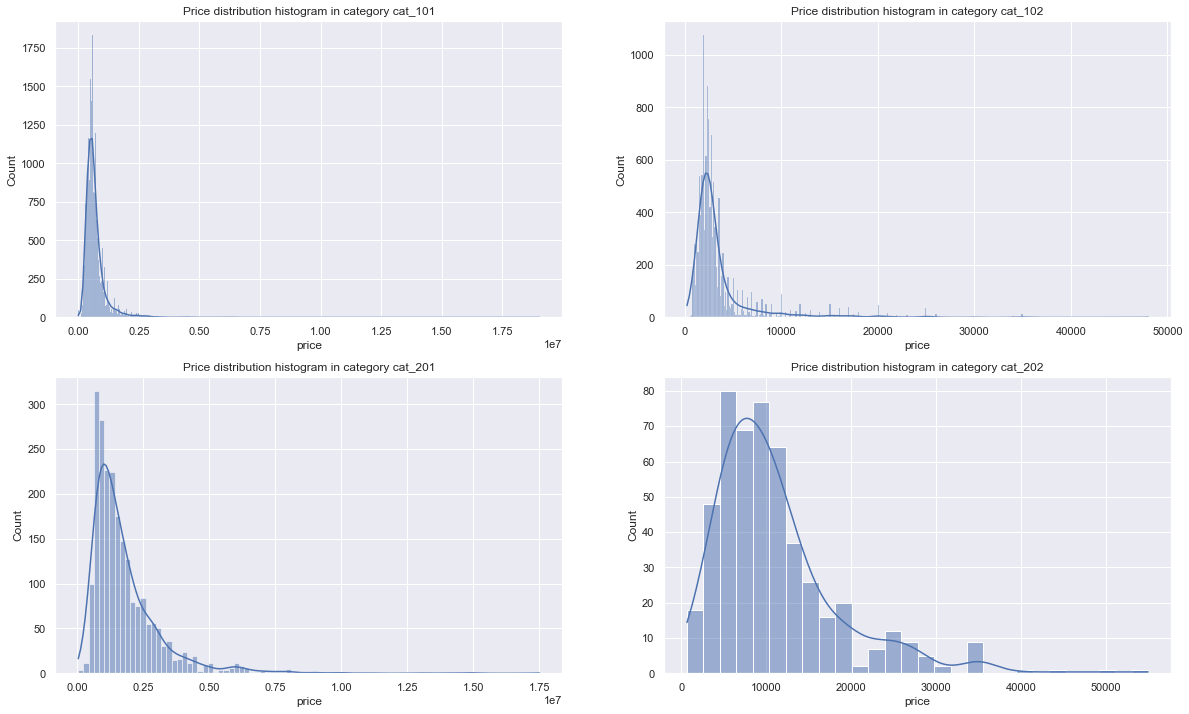

In [116]:
cat_101 = data_market_prices[data_market_prices['category_id']==101]
cat_102 = data_market_prices[data_market_prices['category_id']==102]
cat_201 = data_market_prices[data_market_prices['category_id']==201]
cat_202 = data_market_prices[data_market_prices['category_id']==202]

cats = [cat_101, cat_102, cat_201, cat_202]
iss = [0, 0, 1, 1]
jss = [0, 1, 0, 1]

sns.set_theme(style="darkgrid")

# plotting a price histogram for each category
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(20,12))
for cat, i, j in zip(cats, iss, jss):
    sns.histplot(ax=ax[i,j], data=cat, x='price', kde=True)
    ax[i,j].set_title('Price distribution histogram in category {}'.format(get_df_name(cat)))

There are many outliers in the datasets.  
It would really badly influence the analysis proces so I decide to drop these inacurate rows.
- in cat_101 I drop observations where price is above 2,000,000
- in cat_102 I drop observations where price is above 10,000
- in cat_201 I drop observations where price is above 5,000,000
- in cat_202 I drop observations where price is above 40,000

In [117]:
cat_101_price = cat_101[cat_101['price']<2000000]
cat_102_price = cat_102[cat_102['price']<6000]
cat_201_price = cat_201[cat_201['price']<5000000]
cat_202_price = cat_202[cat_202['price']<40000]

**Price per square meter verification for each category**  

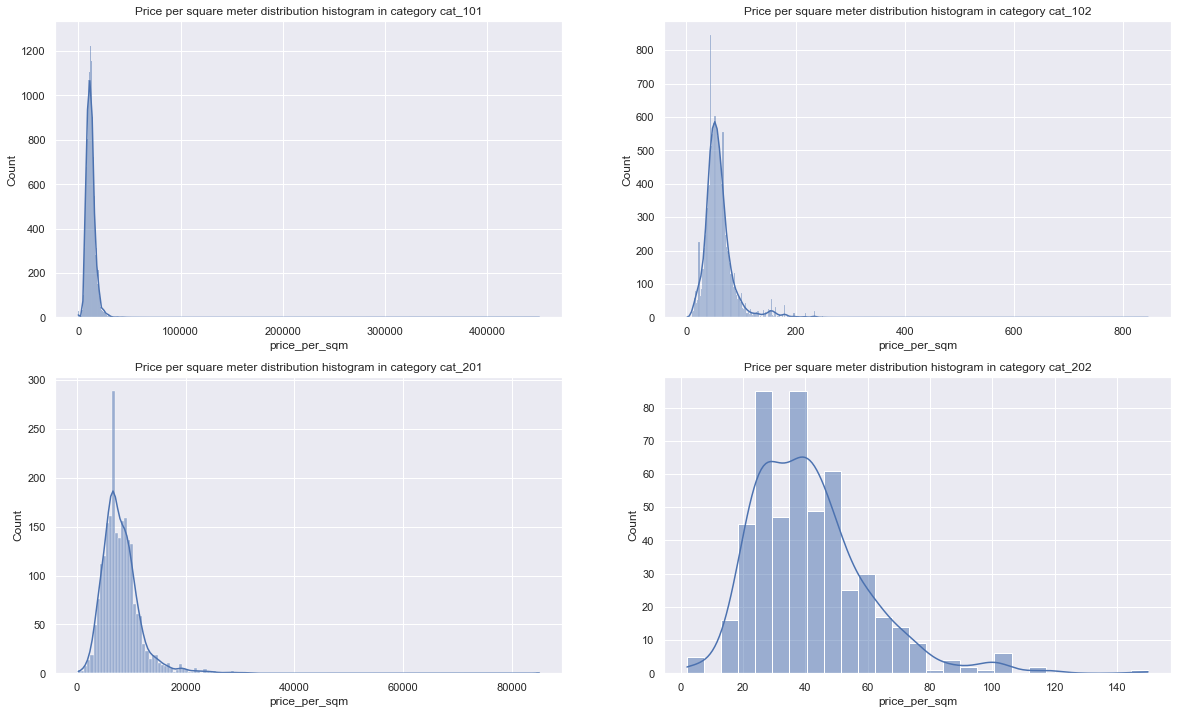

In [118]:
cats = [cat_101, cat_102, cat_201, cat_202]

# plotting a price per square meter histogram for each category
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(20,12))
for cat, i, j in zip(cats, iss, jss):
    sns.histplot(ax=ax[i,j], data=cat, x='price_per_sqm', kde=True)
    ax[i,j].set_title('Price per square meter distribution histogram in category {}'.format(get_df_name(cat)))

There also are a few outliers. Some properties have equal price and price_per_sqm.
- in cat_101 I drop observations where price_per_sqm is above 25,000
- in cat_102 I drop observations where price_per_sqm is above 100
- in cat_201 I drop observations where price_per_sqm is above 20,000
- in cat_202 I drop observations where price_per_sqm is above 125

In [119]:
cat_101_price_ppm = cat_101_price[cat_101_price['price_per_sqm']<25000]
cat_102_price_ppm = cat_102_price[cat_102_price['price_per_sqm']<100]
cat_201_price_ppm = cat_201_price[cat_201_price['price_per_sqm']<20000]
cat_202_price_ppm = cat_202_price[cat_202_price['price_per_sqm']<125]

Dropped rows summary.

In [120]:
dropped = [len(cat_101) - len(cat_101_price_ppm), len(cat_102) - len(cat_102_price_ppm), len(cat_201) - len(cat_201_price_ppm), len(cat_202) - len(cat_202_price_ppm)]

for number, i, cat in zip(dropped, np.arange(len(dropped)), cats):
    print('Dropped {} rows in {}.'.format(dropped[i], get_df_name(cat)))
print('\nOverall dropped overall {} rows.'.format(sum(dropped)))

# updating dataset
data_market_prices = pd.concat([cat_101_price_ppm, cat_102_price_ppm, cat_201_price_ppm, cat_202_price_ppm])

Dropped 1051 rows in cat_101.
Dropped 1558 rows in cat_102.
Dropped 90 rows in cat_201.
Dropped 5 rows in cat_202.

Overall dropped overall 2704 rows.


**Price_per_sqm and price additional verification**

Dropping rows where price or price_per_sqm are 0

In [121]:
price_mask = data_market_prices[(data_market_prices['price_per_sqm']==0) | (data_market_prices['price']==0)]
data_market_prices = data_market_prices.drop(price_mask.index)

print('Dropped {} observations.'.format(len(price_mask)))

Dropped 9 observations.


**Property Size Verification**

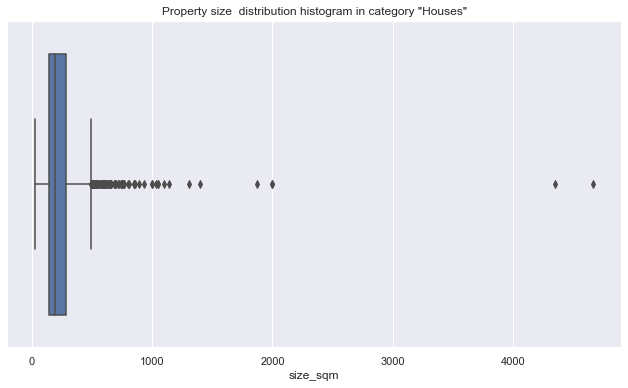

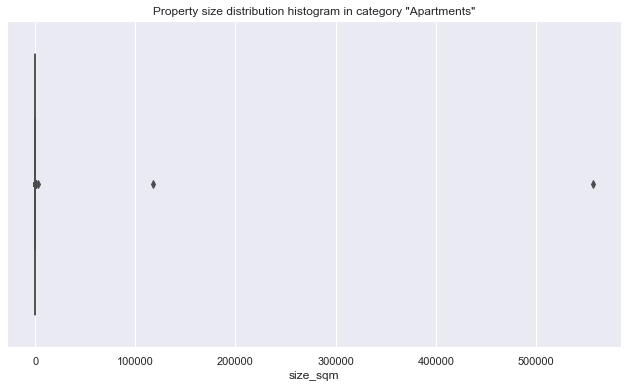

In [122]:
size_ver = data_market_prices.merge(data_categories, on='category_id', how='left')
size_ver['size_sqm'] = round(size_ver['price']/size_ver['price_per_sqm'], 2)
size_house = size_ver[size_ver['subcategory_name']=='Houses']
size_apart = size_ver[size_ver['subcategory_name']=='Apartments']

plt.figure(figsize = (11, 6))
sns.boxplot(data=size_house, x='size_sqm')
plt.title('Property size  distribution histogram in category "Houses"')
plt.show()

plt.figure(figsize = (11, 6))
plt.title('Property size distribution histogram in category "Apartments"')
sns.boxplot(data=size_apart, x='size_sqm')
plt.show()

There also are a few outliers. Some properties are extremly lerge.
- in categroy: Houses I drop observations where size_sqm is above 1000
- in categroy: Apartaments I drop observations where size_sqm is above 200

In [123]:
# Filtering out the outliers
size_house = size_house[size_house['size_sqm']<1000]
size_apart = size_apart[size_apart['size_sqm'] <200]

# updating main DataFrame
size_ver_cleaned = pd.concat([size_house, size_apart])
print('Dropped {} observations.'.format(len(data_market_prices) - len(size_ver_cleaned)))

data_market_prices = size_ver_cleaned.drop(['category_name', 'subcategory_name', 'size_sqm'], axis=1)

Dropped 33 observations.


# **Data Analysis**

### **Historical Properties Data**

In [124]:
data_market_prices.head()

,ad_id,city_id,category_id,market,date_posted,date_expired,price_per_sqm,price,rooms_num
42081,62918584,26,201,secondary,2022-03-25,2022-04-24,13635.0,4077000.0,6.0
42082,62867223,1004,201,secondary,2022-03-11,2022-06-09,2833.0,850000.0,5.0
42083,62783109,26,201,secondary,2022-02-17,2022-03-16,8810.0,1850000.0,5.0
42084,62753258,26,201,secondary,2022-02-09,2022-02-16,14929.0,3680000.0,6.0
42085,62895316,26,201,secondary,2022-03-19,2022-04-29,11217.0,1290000.0,4.0


### **Locations of the properties**

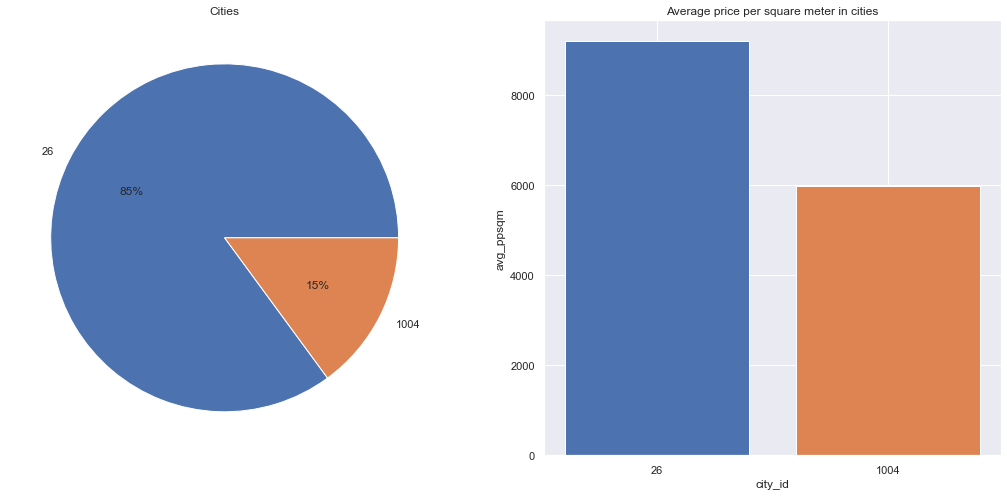

,no,avg_price,avg_ppsqm
city_id,,,
26,38046,557313.22,9205.6
1004,6673,354913.67,5988.8


In [125]:
cities = data_market_prices.groupby('city_id').agg(no=('ad_id', 'size'), avg_price=('price', 'mean'), avg_ppsqm=('price_per_sqm', 'mean')).round(2).reset_index()

plt.figure(figsize=(18,8))

plt.subplot(1, 2, 1)
plt.pie(cities['no'], labels=cities['city_id'], autopct='%.0f%%')
plt.title('Cities')

plt.subplot(1, 2, 2)
y_pos = np.arange(len(cities['city_id']))
plt.bar(y_pos, cities['avg_ppsqm'], color=['C0', 'C1'])
plt.xticks(y_pos, cities['city_id'])
plt.xlabel('city_id')
plt.ylabel('avg_ppsqm')
plt.title('Average price per square meter in cities')
plt.show()

cities.set_index('city_id')

**Conclusions**
- Properties in the dataset are located in 2 cities;
- There is almost 6 times more oversvations of estates where city id is 26 than where city id is 1004;
- Mean price per square meter of the estates with city id 26 is on average 50% bigger than in cities with id 1004  
(properties in city 26 are on average 50% more expensive than in city 1004).

### **Categories**

In [126]:
categories = data_market_prices.groupby('category_id').agg(no=('ad_id', 'size'), 
                                                avg_price=('price', 'mean'), 
                                                avg_ppsqm=('price_per_sqm', 'mean')).round(2).reset_index()

categories = categories.merge(data_categories, on='category_id', how='left')
categories['perc_no'] = round(categories['no']/sum(categories['no'])*100, 2)

labels = ['Apartments for Sale', 'Apartments for Rent', 'Houses for Sale', 'Houses for Rent']

categories = categories[['no', 'perc_no', 'avg_price', 'avg_ppsqm']]
categories.index = labels
categories

,no,perc_no,avg_price,avg_ppsqm
Apartments for Sale,31631,70.73,635127.65,11787.72
Apartments for Rent,10431,23.33,2521.65,52.89
Houses for Sale,2158,4.83,1598906.79,7771.05
Houses for Rent,499,1.12,10843.36,41.21


**Conclusions**
- There are two major categories (Sale and Rent) and two subcategories (Apartments and Houses)
- 94% of the ads are about Apartments and only 6% consider Houses - market is highly  
dominated with apartments;
- 76% of the properties are posted for Sale whereas 24% for Rent;
- Vast majority of the ads are about Apartments for Sale (71%);
- Average ad price per square meter is higher for Apartments for sale and for rent.  
For sale the difference is equal to 50% and for rent 20%.

Detailed analysis has to be splitted by category, because it'll make no sense to compare prices to buy and to rent properties.  

Category: `Sale`
- Subcategory with the biggest average price is `Houses` (over 1,600,000). 
This comes as no surprise as houses usually tend to be more expensive than apartments.  
Price per square meter is also bigger for houses;
- `Apartments` obviously come second with the average price over 600,000.

Category: `Rent`
- Here, the mean price of `Houses` is also greater than the price of `Apartments`;
- But what is interesting price per square meter is greater for `Apartments` by almost 30%.  
So when it comes to properties for rent, `Apartments` seem to be more valuable.

**Structure change of the categories over time**

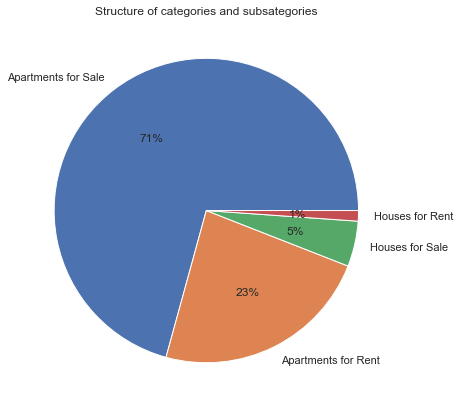

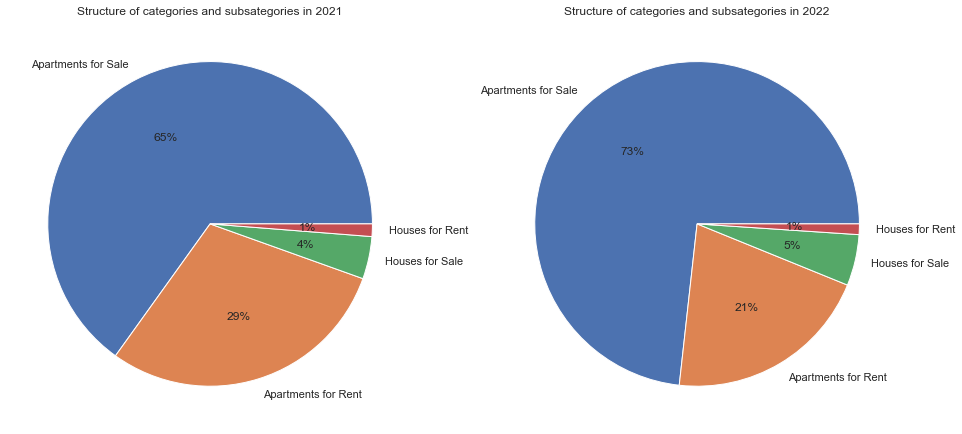

In [127]:
categories = data_market_prices.groupby('category_id').agg(no=('ad_id', 'size'), 
                                                avg_price=('price', 'mean'),
                                                avg_ppsqm=('price_per_sqm', 'mean')).round(2).reset_index()
categories['perc_no'] = round(categories['no']/sum(categories['no'])*100, 2)

categories_2021 = data_market_prices[data_market_prices['date_posted'].dt.year==2021].groupby('category_id').agg(no=('ad_id', 'size'), 
                                                avg_price=('price', 'mean'), 
                                                avg_ppsqm=('price_per_sqm', 'mean')).round(2).reset_index()
categories_2021['perc_no'] = round(categories_2021['no']/sum(categories_2021['no'])*100, 2)

categories_2022 = data_market_prices[data_market_prices['date_posted'].dt.year==2022].groupby('category_id').agg(no=('ad_id', 'size'), 
                                                avg_price=('price', 'mean'), 
                                                avg_ppsqm=('price_per_sqm', 'mean')).round(2).reset_index()
categories_2022['perc_no'] = round(categories_2022['no']/sum(categories_2022['no'])*100, 2)

# pie chart
labels = ['Apartments for Sale', 'Apartments for Rent', 'Houses for Sale', 'Houses for Rent']

plt.figure(figsize=(11,7))
plt.pie(categories['no'], labels=labels, autopct='%.0f%%')
plt.title('Structure of categories and subsategories')
plt.show()

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(16,12))
plt.subplot(1, 2, 1)
plt.pie(categories_2021['no'], labels=labels, autopct='%.0f%%')
plt.title('Structure of categories and subsategories in 2021')

plt.subplot(1, 2, 2)
plt.pie(categories_2022['no'], labels=labels, autopct='%.0f%%')
plt.title('Structure of categories and subsategories in 2022')
plt.show()

It looks like the structure of the categories has not really changed over the years 2021 and 2022.  
Number of apartments for sale has increased by 8 percentage points and the number of apartments for rent  
decreased by the same amount. 

**Histogram and a box plot of each category**

cat_101: Apartments for Sale


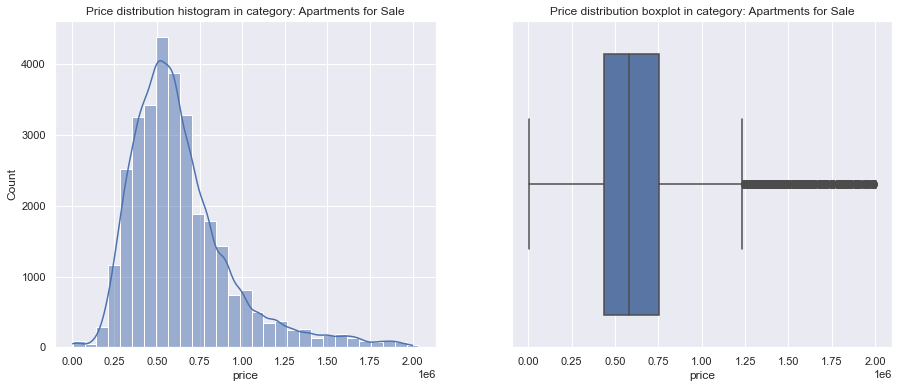

cat_102: Apartments for Rent


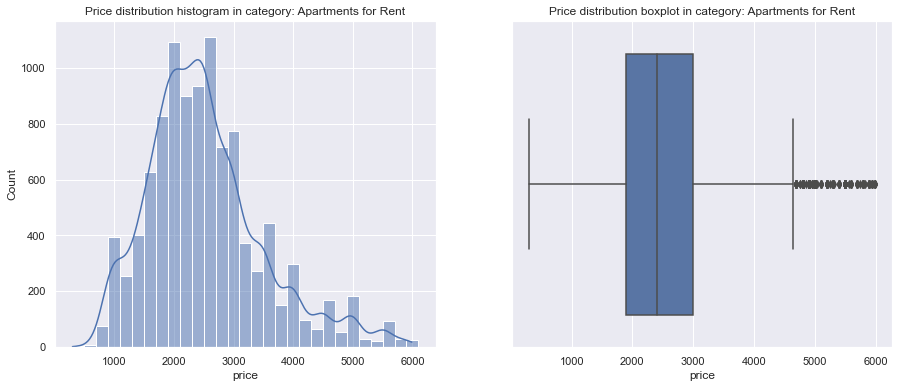

cat_201: Houses for Sale


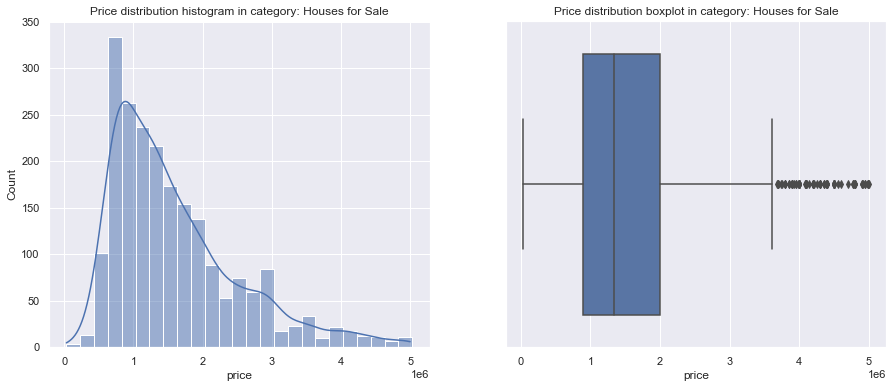

cat_202: Houses for Rent


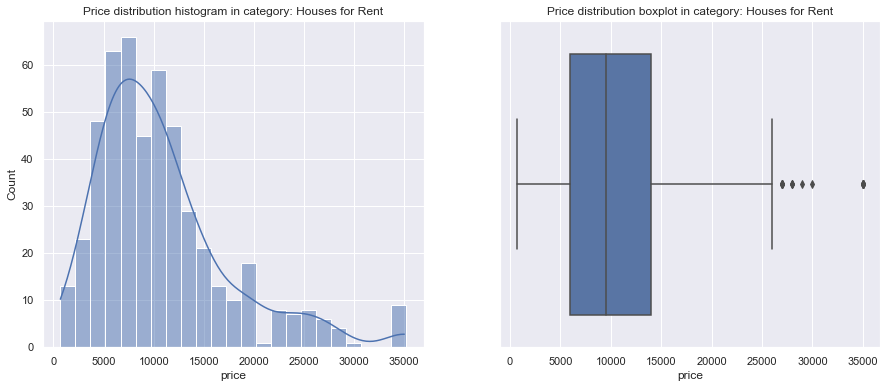

,mean_price,median_price,std_dev,std_dev/mean_price
Apartments for Sale,635127.65,579000.0,298779.72,0.470425
Apartments for Rent,2521.65,2400.0,977.57,0.387671
Houses for Sale,1598906.79,1345539.0,923507.68,0.577587
Houses for Rent,10843.36,9500.0,6744.23,0.621969


In [128]:
data_market_prices_cat = data_market_prices.merge
cat_101 = data_market_prices[data_market_prices['category_id']==101]
cat_102 = data_market_prices[data_market_prices['category_id']==102]
cat_201 = data_market_prices[data_market_prices['category_id']==201]
cat_202 = data_market_prices[data_market_prices['category_id']==202]

cats = [cat_101, cat_102, cat_201, cat_202]

means, medians, stds = [], [], []

for cat in cats:
    means.append(round(cat['price'].mean(), 2))
    medians.append(round(cat['price'].median(), 2))
    stds.append(round(cat['price'].std(), 2))

bins = [70000, 200, 200000, 1500]
descs = ['Apartments for Sale', 'Apartments for Rent', 'Houses for Sale', 'Houses for Rent']

# plotting a histogram for each category
for desc, cat, bin in zip(descs, cats, bins):
    print('{}: {}'.format(get_df_name(cat), desc))
    fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
    sns.histplot(ax=ax[0], data = cat,
        binwidth=bin,
        x='price',
        kde=True)
    ax[0].set_title('Price distribution histogram in category: {}'.format(desc))
    
    sns.boxplot(ax=ax[1], x=cat['price'])
    ax[1].set_title('Price distribution boxplot in category: {}'.format(desc))
    plt.show()

cat_metrics = pd.DataFrame(dict({'category':[get_df_name(i) for i in cats], 'mean_price': means, 'median_price': medians, 'std_dev': stds })).set_index('category')
cat_metrics['std_dev/mean_price'] = cat_metrics['std_dev']/cat_metrics['mean_price']
cat_metrics.index=descs
cat_metrics

- After the filtering all the categories almost have normal distributions - all the outliers were dropped  
during the data cleaning process. 
- In all cases mean prices are greater than median prices what indicates that the distribution should be  
right skewed - confirmation of this can be seen in the charts.
- What is interesting the share of standard deviation in the mean is very high, what indicates that there is a lot  
of variance in the observed data around the mean. This means that the data observed is quite spread out.

### **Market Type**

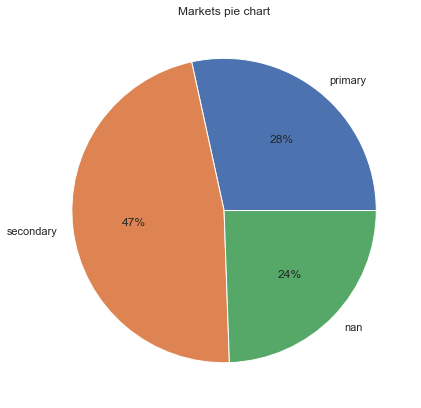

,no,perc_no,avg_ppsqm
market,,,
secondary,21080,47.14,11537.26
primary,12709,28.42,11521.10
NaN,10930,24.44,52.36


In [129]:
# markets summary table
markets = data_market_prices.groupby('market', dropna=False).agg(no=('ad_id', 'size'), 
                                                avg_price=('price', 'mean'), 
                                                avg_ppsqm=('price_per_sqm', 'mean')).round(2)
markets['perc_no'] = round(markets['no']/sum(markets['no'])*100, 2)
markets = markets[['no', 'perc_no', 'avg_ppsqm']]

# pie chart
labels = list(markets.index)
plt.figure(figsize=(7,7))
plt.pie(markets['no'], labels=labels, autopct='%.0f%%')
plt.title('Markets pie chart')
plt.show()

markets.sort_values('no', ascending=False)

- Over 45% of the properties are on secondary market and almost 30% are on primary market;
- There are so many NaN values in this coumn because properties for rent can not be classified to neither market type;
- What is interesting prices on secondary market are very similar primary.

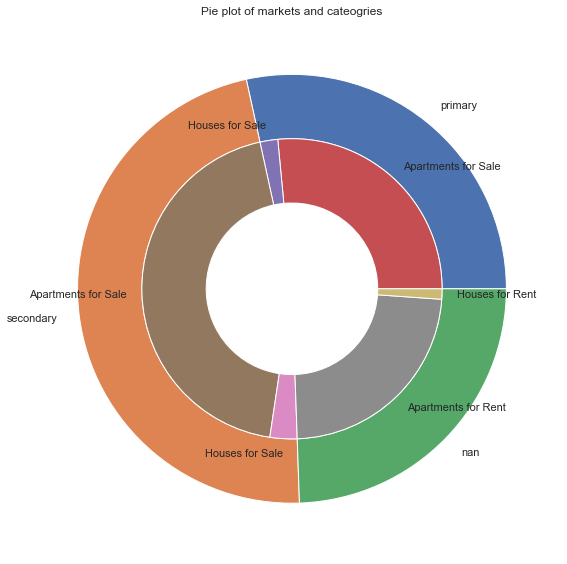

no  perc_no   avg_price  \
market    category_name subcategory_name                               
primary   Sale          Apartments        11855    26.51   645679.12   
                        Houses              854     1.91  1105255.46   
secondary Sale          Apartments        19776    44.22   628802.43   
                        Houses             1304     2.92  1922202.98   
NaN       Rent          Apartments        10431    23.33     2521.65   
                        Houses              499     1.12    10843.36   

                                          avg_ppsqm  
market    category_name subcategory_name             
primary   Sale          Apartments         11841.37  
                        Houses              7075.25  
secondary Sale          Apartments         11755.55  
                        Houses              8226.73  
NaN       Rent          Apartments            52.89  
                        Houses                41.21

In [130]:
markets_cats = data_market_prices.groupby(['market', 'category_id'], dropna=False).agg(no=('ad_id', 'size'), 
                                                avg_price=('price', 'mean'), 
                                                avg_ppsqm=('price_per_sqm', 'mean')).round(2).reset_index()
markets_cats['perc_no'] = round(markets_cats['no']/sum(markets_cats['no'])*100, 2)
markets_cats = markets_cats.merge(data_categories, on='category_id', how='left')
markets_cats.set_index(['market', 'category_name', 'subcategory_name'], inplace=True)
markets_cats = markets_cats[['no', 'perc_no', 'avg_price', 'avg_ppsqm']]

outer = data_market_prices.groupby('market', dropna=False)['ad_id'].size()
inner = data_market_prices.groupby(['market', 'category_id'], dropna=False)['ad_id'].size()

inner_labels = markets_cats.index.get_level_values(2) + ' for ' + markets_cats.index.get_level_values(1)

fig, ax = plt.subplots(figsize=(16,8))
size = 0.3

ax.pie(outer.values.flatten(), radius=1,
       labels=outer.index,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(inner.values.flatten(), radius=1-size, 
       labels = inner_labels,
       wedgeprops=dict(width=size, edgecolor='w',))

ax.set(aspect="equal", title='Pie plot of markets and cateogries')
plt.tight_layout()
plt.show()

markets_cats

- Because properties for rent are in neither primary, nor secondaty market thay have  
been assigned to NaN market.
- Prices in the primary and secondary market are nearly identical
- Share of apartments in each market is very similar ~8%

### **Price Change Over Time in Each Category**

**General market overview**

In [131]:
prices_2021 = data_market_prices[data_market_prices['date_posted'].dt.year == 2021].groupby('category_id').agg(no=('ad_id', 'size'), avg_price_2021=('price', 'mean')).round(2)
prices_2022 = data_market_prices[data_market_prices['date_posted'].dt.year == 2022].groupby('category_id').agg(no=('ad_id', 'size'), avg_price_2022=('price', 'mean')).round(2)

prices = pd.merge(prices_2021, prices_2022, how='inner', on=['category_id'])
prices['increase'] = prices['avg_price_2022']-prices['avg_price_2021']
prices['% increase'] = round(100*(prices['avg_price_2022']-prices['avg_price_2021'])/prices['avg_price_2021'], 2)

prices = prices.reset_index().merge(data_categories, on='category_id', how='left').reset_index()
prices = prices[['category_name', 'subcategory_name', 'avg_price_2021', 'avg_price_2022', 'increase', '% increase']]

categories = prices.groupby('category_name').mean().round(2)
categories

,avg_price_2021,avg_price_2022,increase,% increase
category_name,,,,
Rent,5599.47,7263.22,1663.75,23.94
Sale,1020925.04,1153384.52,132459.49,13.57


In [132]:
prices.set_index(['category_name', 'subcategory_name'])

,,avg_price_2021,avg_price_2022,increase,% increase
category_name,subcategory_name,,,,
Sale,Apartments,573853.90,659404.56,85550.66,14.91
Rent,Apartments,2322.11,2648.70,326.59,14.06
Sale,Houses,1467996.18,1647364.49,179368.31,12.22
Rent,Houses,8876.83,11877.74,3000.91,33.81


**Conclusions**   
- Buying a property is on average more expensive by over 130,000 (14% increase)
- Renting a property is on average more expensive by almost 1,700 (24% increase)
- Prices have gone up in the whole market
- The biggest change occured in the house rental field, where the price has gone up by almost 35%!
- Each of the remaining markets grew by an average of 15%

**Specific markets**

In [133]:
time_table = data_market_prices.merge(data_categories, on='category_id', how='left')
time_table = time_table[['ad_id', 'market', 'category_id', 'category_name', 'subcategory_name', 'date_posted', 'date_expired', 'price', 'price_per_sqm']]
time_table.head()

,ad_id,market,category_id,category_name,subcategory_name,date_posted,date_expired,price,price_per_sqm
0,62918584,secondary,201,Sale,Houses,2022-03-25,2022-04-24,4077000.0,13635.0
1,62867223,secondary,201,Sale,Houses,2022-03-11,2022-06-09,850000.0,2833.0
2,62783109,secondary,201,Sale,Houses,2022-02-17,2022-03-16,1850000.0,8810.0
3,62753258,secondary,201,Sale,Houses,2022-02-09,2022-02-16,3680000.0,14929.0
4,62895316,secondary,201,Sale,Houses,2022-03-19,2022-04-29,1290000.0,11217.0


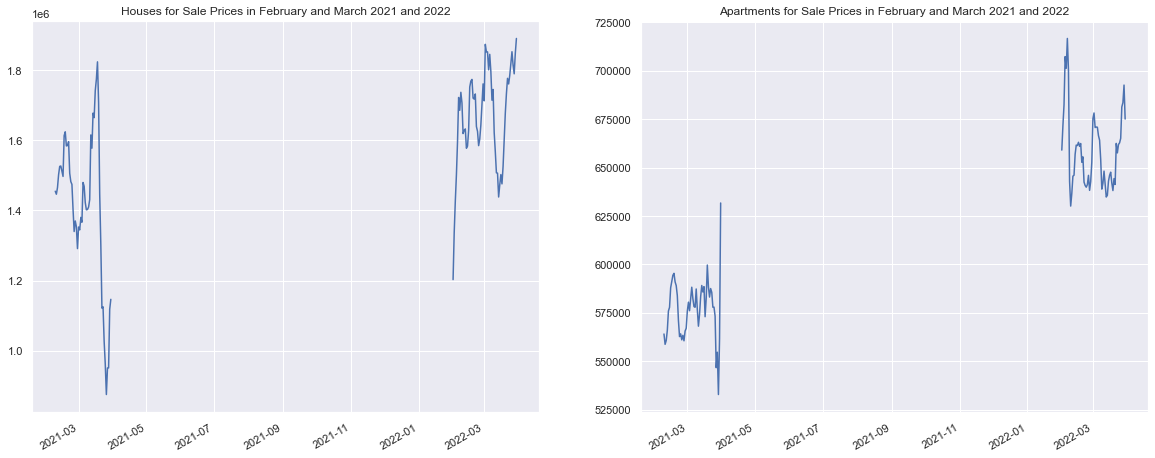

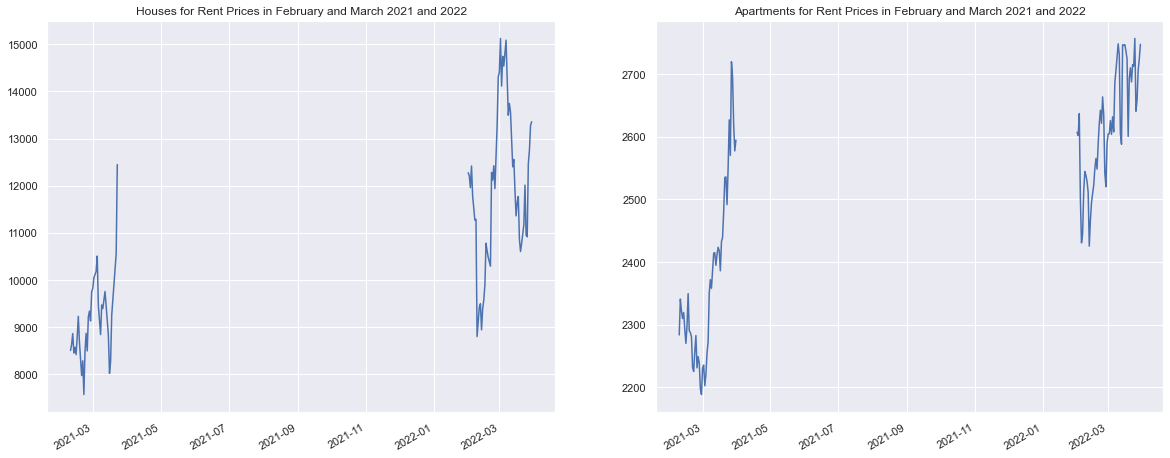

In [134]:
y_sale_house = time_table[(time_table['category_name']=='Sale') & (time_table['subcategory_name']=='Houses')]
y_sale_apart = time_table[(time_table['category_name']=='Sale') & (time_table['subcategory_name']=='Apartments')]
y_rent_house = time_table[(time_table['category_name']=='Rent') & (time_table['subcategory_name']=='Houses')]
y_rent_apart = time_table[(time_table['category_name']=='Rent') & (time_table['subcategory_name']=='Apartments')]

roll = 8

y_sale_house_agg = y_sale_house.groupby('date_posted').mean()['price'].rolling(roll).mean().reset_index()
y_sale_apart_agg = y_sale_apart.groupby('date_posted').mean()['price'].rolling(roll).mean().reset_index()
y_rent_house_agg = y_rent_house.groupby('date_posted').mean()['price'].rolling(roll).mean().reset_index()
y_rent_apart_agg = y_rent_apart.groupby('date_posted').mean()['price'].rolling(roll).mean().reset_index()

ys = [y_sale_house_agg, y_sale_apart_agg, y_rent_house_agg, y_rent_apart_agg]
cats = ['Sale', 'Sale', 'Rent', 'Rent']
subcats = ['Houses', 'Apartments', 'Houses', 'Apartments']
iss = [0, 1, 0, 1]

#plt.style.use("seaborn-darkgrid")
for y, sub, cat, i in zip(ys, subcats, cats, iss):
    z = pd.Series(y['price'])
    z.index = y['date_posted']
    z = pd.concat([z, pd.Series(np.arange(306), pd.date_range('2021-04-01', '2022-01-31')).replace(np.arange(306), np.NaN)])
    if i==0:
        plt.figure(figsize=(20,8))
        plt.subplot(1, 2, 1)
    else:
        plt.subplot(1, 2, 2)
    z.plot()
    plt.title('{} for {} Prices in February and March 2021 and 2022'.format(sub, cat))
    if i==1:
        plt.show()

Plots presenting mentioned market changes. I used rolling average to make them more readable.  
There is a gap between 03-2021 and 02-2022 due to the face that this data was not in the dataset.  

Relatively big disturbance that can be noticed at the end of 03-2021 and 02-2022 is caused by a small  
number of observations from these periods, as evidenced in the table below.

In [135]:
pd.DataFrame(y_sale_house.groupby('date_posted').agg(obs_no=('ad_id', 'size')).sort_values('obs_no')).head()

,obs_no
date_posted,
2021-03-27,1
2021-03-20,1
2021-03-13,1
2021-03-29,2
2021-03-21,2


**Detailed charts divided into categories and years**

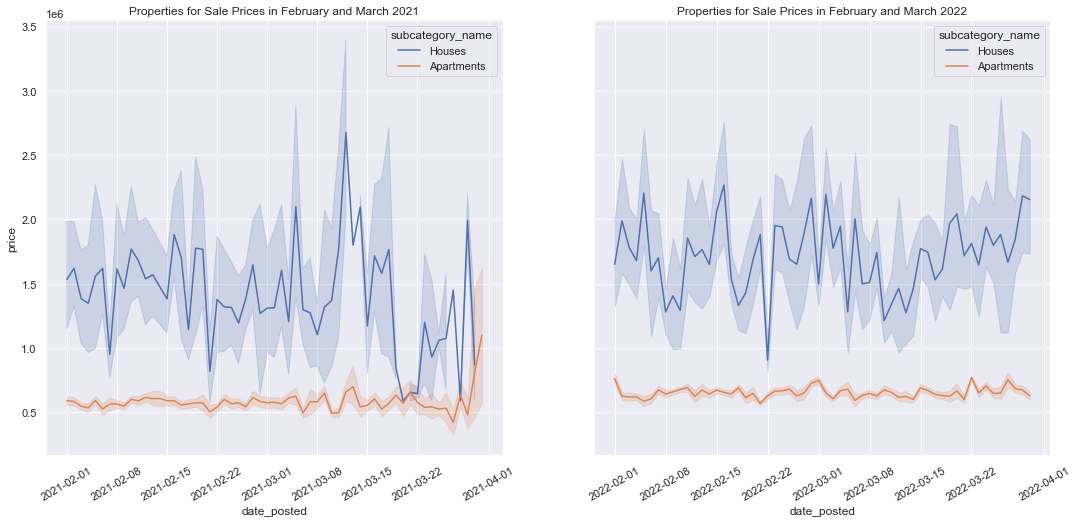

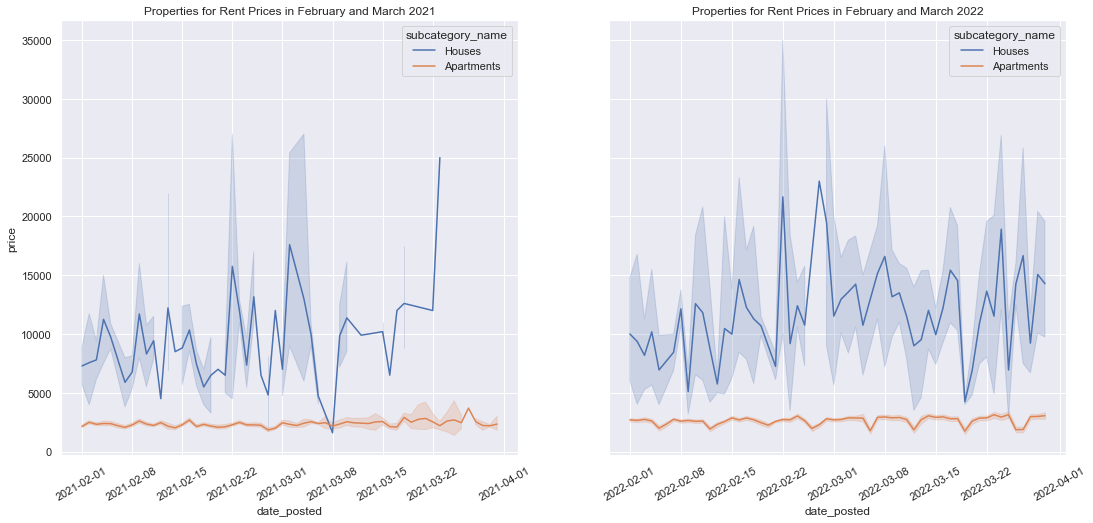

In [136]:
sale_2021 = time_table[(time_table['category_name']=='Sale') & (time_table['date_posted'].dt.year == 2021)]
sale_2022 = time_table[(time_table['category_name']=='Sale') & (time_table['date_posted'].dt.year == 2022)]
rent_2021 = time_table[(time_table['category_name']=='Rent') & (time_table['date_posted'].dt.year == 2021)]
rent_2022 = time_table[(time_table['category_name']=='Rent') & (time_table['date_posted'].dt.year == 2022)]

times = [sale_2021, sale_2022, rent_2021, rent_2022]
cats = ['Sale', 'Sale', 'Rent', 'Rent']
years = [2021, 2022, 2021, 2022]
iss = [0, 1, 0, 1]

for time, cat, year, i in zip(times, cats, years, iss):
    if i==0:
        fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8), sharey=True)
    sns.lineplot(ax=ax[i], data=time, 
                    x='date_posted', 
                    y='price',
                    hue='subcategory_name')
    ax[i].tick_params(axis='x', labelrotation = 30)
    ax[i].set_title('Properties for {} Prices in February and March {}'.format(cat, year))

In all cases, real estate appears to be in a slow upward trend not only comparing year to year,  
but also separatly in each of the given periods.

In [137]:
total_2021 = len(sale_2021) + len(rent_2021)
total_2022 = len(sale_2022) + len(rent_2022)

total_change = round(((total_2022 - total_2021)/total_2021)*100, 2)

print('Total number of properties in 2021:', total_2021)
print('Total number of properties in 2022:', total_2022)
print('\nTotal number of properties increased by {}%'.format(total_change))

Total number of properties in 2021: 13789
Total number of properties in 2022: 30930

Total number of properties increased by 124.31%


**Conclusions**  
- The main reasons for such market changes should be looked for among macroeconomic factors.  
- War and a difficult economic situation may be the most likely factors behind the rise in prices.
- It is very interesting that the rise in prices was accompanied by an increase in the number of properties  
on the market. Additional supply in the market should cause prices in the market to fall, not to increase them

### **Relation Between Number of Rooms and Price**

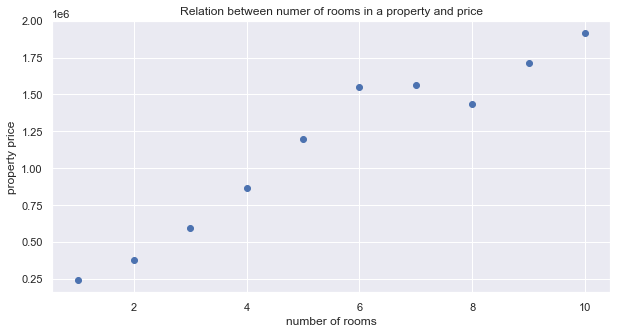

,mean_price
rooms_num,
1.0,240509.69
2.0,375400.05
3.0,594718.28
4.0,867078.34
5.0,1199846.95
6.0,1551386.55
7.0,1562434.11
8.0,1433299.97
9.0,1715877.61


In [138]:
prices_rooms = data_market_prices[data_market_prices['rooms_num'] < 98].groupby('rooms_num').agg(mean_price=('price', 'mean')).round(2) 

plt.figure(figsize=(10,5))
plt.scatter(x=prices_rooms.index, y=prices_rooms.values)
plt.xlabel('number of rooms')
plt.ylabel('property price')
plt.title('Relation between numer of rooms in a property and price')
plt.show()

pd.DataFrame(prices_rooms)

- In order to visualise this relation I grouped the data by the number of rooms  
and calculated average price for each one of them
- Number of rooms in property seems to have a large influence on the price.  
If the number of rooms in the property increases so does the property price.

### **Relation Between Property Size and Price**

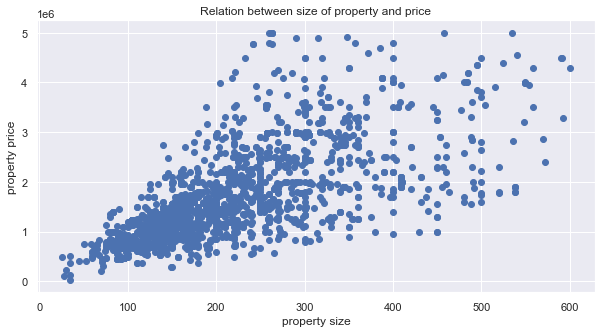

In [139]:
prices_sizes = data_market_prices[(data_market_prices['category_id']==201)].copy()
prices_sizes['size_sqm'] = round(prices_sizes['price']/prices_sizes['price_per_sqm'], 2)

# making the plot more readable
prices_sizes = prices_sizes[prices_sizes['size_sqm']<600]

plt.figure(figsize=(10,5))
plt.scatter(x=prices_sizes['size_sqm'], y=prices_sizes['price'])
plt.xlabel('property size')
plt.ylabel('property price')
plt.title("Relation between size of property and price")
plt.show()

- In odred to visualise this relation I used the most populated category: Apartments for Sale.
- Size of property also does seems to have a large influence on the price.  
If the size of the property increases so does the property price.

### **Analysis of Promotional Products Purchases Made by Sellers**

**General statistics**

In [140]:
promotional_products = data_vas_purchases.merge(data_categories, on='category_id', how='left')
promotional_products.head()

,date_day,ad_id,city_id,category_id,amount_spend_to_promote_ads,category_name,subcategory_name
0,2022-03-06,62845828,26,102,22.19,Rent,Apartments
1,2021-03-03,61574280,26,101,11.09,Sale,Apartments
2,2021-03-23,61540306,26,102,22.19,Rent,Apartments
3,2022-02-26,62819726,26,102,22.19,Rent,Apartments
4,2022-03-11,62679776,26,101,18.86,Sale,Apartments


In [141]:
promotional_products = data_vas_purchases.merge(data_categories, on='category_id', how='left')
general_stats = promotional_products.agg(products_purchased=('amount_spend_to_promote_ads', 'size'), 
                        avg_spent_to_promote=('amount_spend_to_promote_ads', 'mean'), 
                        sum_spent_to_promote=('amount_spend_to_promote_ads', 'sum')).round(2).transpose().reset_index(drop=True)
general_stats

,products_purchased,avg_spent_to_promote,sum_spent_to_promote
0,9458.0,26.32,248901.73


- 9485 promotional products were purchasesd by sellers
- average amount spent per 1 promotional product is equal to 26.32
- almost 250,000 is a total amount spent to promote by all sellers

**Top Buyers**

In [142]:
buyer_stats = promotional_products.groupby('ad_id').agg(products_purchased=('amount_spend_to_promote_ads', 'size'),
                                        avg_spent_to_promote=('amount_spend_to_promote_ads', 'mean'),
                                        sum_spent_to_promote=('amount_spend_to_promote_ads', 'sum')).round(2)
sorts = ['products_purchased', 'avg_spent_to_promote', 'sum_spent_to_promote']

# magic parameter
i = 2

buyer_stats.sort_values(sorts[i], ascending=False).head(10)

,products_purchased,avg_spent_to_promote,sum_spent_to_promote
ad_id,,,
61574657,4,238.62,954.48
62481676,2,332.99,665.98
61393210,10,63.25,632.54
62913283,1,603.80,603.80
61328575,6,97.10,582.60
62818302,2,283.04,566.08
61677890,1,554.99,554.99
61595858,1,554.99,554.99
62055503,4,133.19,532.76


Query above allows (depending on sorting column) to display top 10 ad_ids that:
- had been promoted most times [magic parameter i=0]
- had biggest total amount spent to promote [magic parameter i=1]
- had biggest average amount spent per each promotional product [magic parameter i=2]


**Fun facts:**
- The ad with the most promotional product was promoted 15 times
- Over 950[units] were spent on the ad with the most total money spent on promotional products
- The most expensive promotional product costed over 600[units]

### **Amount Spent per Each Category**

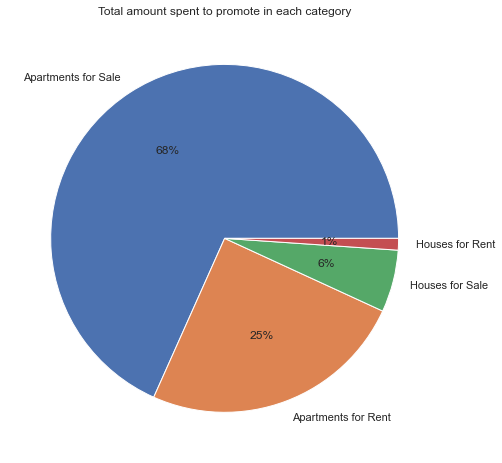

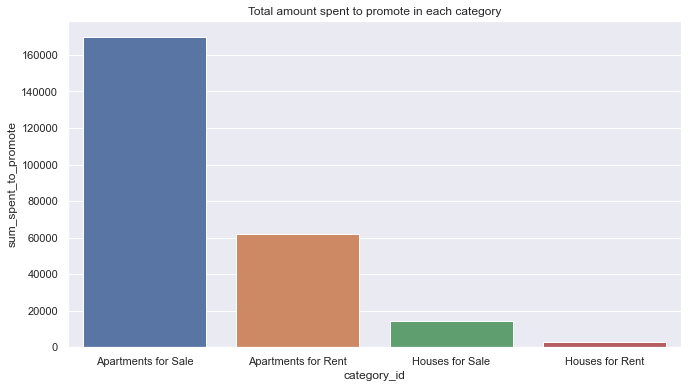

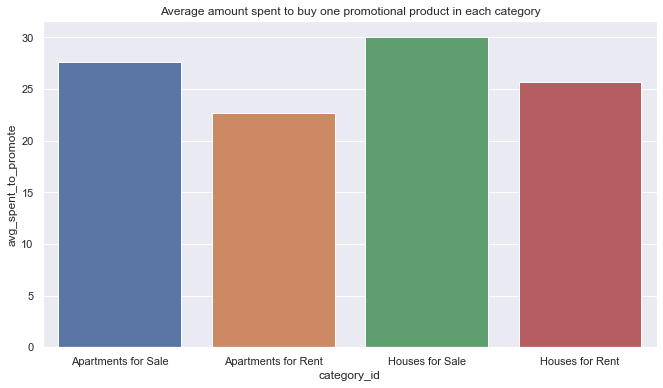

,,products_purchased,avg_spent_to_promote,sum_spent_to_promote
category_name,subcategory_name,,,
Sale,Apartments,6148,27.66,170045.15
Rent,Apartments,2727,22.65,61779.49
Sale,Houses,478,30.08,14378.76
Rent,Houses,105,25.70,2698.33


In [143]:
cat_stats = promotional_products.groupby(['category_id', 'category_name', 'subcategory_name']).agg(products_purchased=('amount_spend_to_promote_ads', 'size'),
                                        avg_spent_to_promote=('amount_spend_to_promote_ads', 'mean'),
                                        sum_spent_to_promote=('amount_spend_to_promote_ads', 'sum')).round(2).reset_index()

cat_stats = cat_stats.set_index(['category_name', 'subcategory_name'])

labels = cat_stats.index.get_level_values(1) + ' for ' + cat_stats.index.get_level_values(0)
plt.figure(figsize=(10,8))
plt.pie(cat_stats['sum_spent_to_promote'], labels=labels, autopct='%.0f%%')
plt.title('Total amount spent to promote in each category')
plt.show()

plt.figure(figsize=(11, 6))
ax = sns.barplot(x='category_id', y='sum_spent_to_promote', data=cat_stats)
ax.set_xticklabels(labels) 
plt.title('Total amount spent to promote in each category')
plt.show()

plt.figure(figsize=(11, 6))
ax = sns.barplot(x='category_id', y='avg_spent_to_promote', data=cat_stats)
ax.set_xticklabels(labels) 
plt.title('Average amount spent to buy one promotional product in each category')
plt.show()

cat_stats.drop('category_id', axis=1, inplace=True)

cat_stats

Structure of the pie chat is almost exactly the same as the structure of the graph presenting the share of  
each category in total properties posted. This makes sense because the more ads is in a given category,  
the more likely it is that one of the advertisers will be tempted to buy a promotional product.

Average price of one promotional product purchased by sellers is fairly equal across all categories.  
This may mean that the industries selling promotional products charge equally for all property categories.

### **Summary**

The goal of this project was to examine the real estate market. In order to achieve it I cleaned the data,  
allowing further exploration. During the analysis I managed to check multiple factors affecting the market  
as a whole. A also alaised the data after splitting it by categories and years enabling deeper understanding  
of the data structure and the story it has to tell.

Thank you for your time.